Here's the content formatted in Markdown:

# 1. Installing Required Libraries

Before diving into data analysis, it's essential to install all necessary Python libraries. This includes:

* **Pandas**: For data manipulation and analysis
* **FuzzyWuzzy & RapidFuzz**: For fuzzy string matching
* **Dask**: For parallel computing with large datasets
* **PySpark**: For large-scale data processing using Apache Spark

We'll use pip to install these libraries directly within the Jupyter Notebook.

In [1]:
pip install pandas fuzzywuzzy rapidfuzz dask pyspark


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.0 MB/s eta 0:00:00


Here's the content formatted in Markdown:

# 2. Importing Libraries and Sampling Data with PySpark

In this cell, we perform the following tasks:

## Import Necessary Libraries

* **Pandas**: For data manipulation
* **Random**: For random number generation
* **PySpark**: For efficient large-scale data processing

## Initialize Spark Session
Establish a Spark session to leverage PySpark's capabilities.

## Define File Paths and Sampling Parameters

* **input_file**: Path to the input CSV containing MTA Subway Hourly Ridership data
* **output_file**: Path where the sampled data will be saved
* **sample_fraction**: Fraction of data to sample (1% in this case)
* **random_seed**: Seed for reproducibility

## Sampling the Data

* Read the CSV using PySpark
* Sample the data based on the specified fraction
* Save the sampled data to a new CSV file

In [2]:
from google.colab import files


uploaded = files.upload()

Saving MTA_Customer_Feedback_Data__2014-2019.csv to MTA_Customer_Feedback_Data__2014-2019.csv
Saving MTA_Daily_Ridership_Data__Beginning_2020.csv to MTA_Daily_Ridership_Data__Beginning_2020.csv
Saving MTA_Key_Performance_Indicators__2008-2021.csv to MTA_Key_Performance_Indicators__2008-2021.csv
Saving MTA_NYCT_Safety_Data__Beginning_2019.csv to MTA_NYCT_Safety_Data__Beginning_2019.csv
Saving MTA_Subway_Customer_Journey-Focused_Metrics__Beginning_2020.csv to MTA_Subway_Customer_Journey-Focused_Metrics__Beginning_2020.csv
Saving MTA_Subway_Hourly_Ridership__Beginning_2025.csv.crdownload to MTA_Subway_Hourly_Ridership__Beginning_2025.csv.crdownload
Saving MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv to MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv
Saving MTA_Subway_Major_Incidents__Beginning_2020.csv to MTA_Subway_Major_Incidents__Beginning_2020.csv
Saving MTA_Subway_Stations.csv to MTA_Subway_Stations.csv
Saving MTA_Subway_Stations_and_Complexes.csv to MTA_Subway_S

In [54]:
# 📦 Install libraries
!pip install -q pandas matplotlib seaborn prophet pyspark

# 📚 Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from pyspark.sql import SparkSession

# ⚙️ Initialize Spark (if needed)
spark = SparkSession.builder.appName("MTA_Subway_Analysis").getOrCreate()

In [110]:
df_daily = spark.read.csv("MTA_Daily_Ridership_Data__Beginning_2020.csv", header=True, inferSchema=True).toPandas()
df_hourly = spark.read.csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv", header=True, inferSchema=True).toPandas()
df_feedback = spark.read.csv("MTA_Customer_Feedback_Data__2014-2019.csv", header=True, inferSchema=True).toPandas()
df_kpi = spark.read.csv("MTA_Key_Performance_Indicators__2008-2021.csv", header=True, inferSchema=True).toPandas()
df_safety = spark.read.csv("MTA_NYCT_Safety_Data__Beginning_2019.csv", header=True, inferSchema=True).toPandas()
df_journey = spark.read.csv("MTA_Subway_Customer_Journey-Focused_Metrics__Beginning_2020.csv", header=True, inferSchema=True).toPandas()
df_incidents = spark.read.csv("MTA_Subway_Major_Incidents__Beginning_2020.csv", header=True, inferSchema=True).toPandas()
df_stations = spark.read.csv("MTA_Subway_Stations.csv", header=True, inferSchema=True).toPandas()
df_complexes = spark.read.csv("MTA_Subway_Stations_and_Complexes.csv", header=True, inferSchema=True).toPandas()
df_otp = spark.read.csv("MTA_Subway_Terminal_On-Time_Performance__Beginning_2020_20240727.csv", header=True, inferSchema=True).toPandas()
df_delays = spark.read.csv("MTA_Subway_Trains_Delayed__Beginning_2025.csv", header=True, inferSchema=True).toPandas()

# Preview
for name, df in {
    "Daily Ridership": df_daily,
    "Customer Feedback": df_feedback,
    "KPI": df_kpi,
    "Safety": df_safety,
    "Journey Metrics": df_journey,
    "Major Incidents": df_incidents,
    "Hourly Ridership": df_hourly,
    "Stations": df_stations,
    "Station Complexes": df_complexes,
    "OTP": df_otp,
    "Delays": df_delays
}.items():
    print(f"\n📊 {name}:\n")
    display(df.head())



📊 Daily Ridership:



,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,07/25/2024,3634815,0.69,1123778,0.54,255367.0,0.81,214281,0.76,35373,1.25,990676,1.03,6844.0,0.50
1,07/24/2024,3654248,0.69,1192941,0.58,249158.0,0.79,224862,0.79,36652,1.29,947798,0.99,7255.0,0.53
2,07/23/2024,3605664,0.68,1197058,0.58,247915.0,0.78,229842,0.81,35110,1.24,928295,0.97,7177.0,0.52
3,07/22/2024,3235046,0.61,1161435,0.56,231813.0,0.73,215087,0.76,32431,1.14,937858,0.98,6510.0,0.47
4,07/21/2024,1877551,0.80,656891,0.60,126169.0,1.20,111438,1.05,21664,1.31,962715,1.09,2080.0,0.58



📊 Customer Feedback:



,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,SIM33C
2,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,B8
3,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,BM4
4,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019,4,Q46



📊 KPI:



,Indicator Sequence,Parent Sequence,Agency Name,Indicator Name,Description,Category,Frequency,Desired Change,Indicator Unit,Decimal Places,Period Year,Period Month,YTD Target,YTD Actual,Monthly Target,Monthly Actual,Period
0,74039,0,Bridges and Tunnels,Collisions with Injury Rate,All customer collisions with injuries on B&T p...,Safety Indicators,M,D,-,2,2008,1,0.75,0.54,0.75,0.54,2008-01-01
1,74039,0,Bridges and Tunnels,Collisions with Injury Rate,All customer collisions with injuries on B&T p...,Safety Indicators,M,D,-,2,2008,2,0.89,0.75,1.02,0.98,2008-02-01
2,74039,0,Bridges and Tunnels,Collisions with Injury Rate,All customer collisions with injuries on B&T p...,Safety Indicators,M,D,-,2,2008,3,0.90,0.77,0.92,0.80,2008-03-01
3,74039,0,Bridges and Tunnels,Collisions with Injury Rate,All customer collisions with injuries on B&T p...,Safety Indicators,M,D,-,2,2008,4,0.97,0.79,1.20,0.84,2008-04-01
4,74039,0,Bridges and Tunnels,Collisions with Injury Rate,All customer collisions with injuries on B&T p...,Safety Indicators,M,D,-,2,2008,5,0.99,0.94,1.08,1.49,2008-05-01



📊 Safety:



,Month,Department,Metric,Value
0,04/01/2019,Bus,Bus Collision Per Million Miles,53.04
1,04/01/2019,Bus,Bus Collision Injuries Per Million Miles,3.76
2,04/01/2019,Bus,Bus Customer Accidents per million customers,1.48
3,04/01/2019,Subway,Subway Customer Accidents,2.80
4,04/01/2019,Subway,Subway Fires,57.00



📊 Journey Metrics:



,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2020-01-01,A DIVISION,1,offpeak,7175651.0,1.881154,0.762318,13498506.0,5470124.50,876067.4,0.122089,0.877911
1,2020-01-01,A DIVISION,1,peak,7976981.5,1.612034,0.690113,12859167.0,5505022.50,901543.3,0.113018,0.886982
2,2020-01-01,A DIVISION,2,offpeak,4897338.5,1.810272,0.274704,8865514.0,1345319.40,767125.2,0.156641,0.843359
3,2020-01-01,A DIVISION,2,peak,5525236.0,1.536624,0.197920,8490208.0,1093555.80,701104.0,0.126891,0.873109
4,2020-01-01,A DIVISION,3,offpeak,3501265.8,1.547511,0.288822,5418245.5,1011241.06,403843.7,0.115342,0.884658



📊 Major Incidents:



,month,division,line,day_type,category,count
0,2020-01-01,A DIVISION,1,1,Other,1
1,2020-01-01,A DIVISION,2,1,Persons on Trackbed/Police/Medical,1
2,2020-01-01,A DIVISION,2,2,Other,1
3,2020-01-01,A DIVISION,3,1,Persons on Trackbed/Police/Medical,1
4,2020-01-01,A DIVISION,3,1,Signals,2



📊 Hourly Ridership:



,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,1/8/2024 17:00,subway,71,8 Av (N),Brooklyn,metrocard,Metrocard - Seniors & Disability,57,4,40.635063,-74.01172,POINT (-74.01172 40.635063)
1,1/8/2024 17:00,subway,8,"5 Av/59 St (N,R,W)",Manhattan,metrocard,Metrocard - Other,72,1,40.764812,-73.97335,POINT (-73.97335 40.764812)
2,1/8/2024 18:00,subway,215,"Tremont Av (B,D)",Bronx,metrocard,Metrocard - Full Fare,23,4,40.850410,-73.90523,POINT (-73.90523 40.85041)
3,1/8/2024 18:00,staten_island_railway,502,Tompkinsville (SIR),Staten Island,metrocard,Metrocard - Unlimited 7-Day,4,0,40.636948,-74.07484,POINT (-74.07484 40.636948)
4,1/8/2024 18:00,subway,103,"Bowery (J,Z)",Manhattan,metrocard,Metrocard - Unlimited 7-Day,10,0,40.720280,-73.99391,POINT (-73.99391 40.72028)



📊 Stations:



,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
0,127,317,611,IRT,Broadway - 7Av,Times Sq-42 St,M,True,1 2 3,Subway,40.755290,-73.987495,Uptown,Downtown,1,1,1,None,POINT (-73.987495 40.75529)
1,S17,515,515,SIR,Staten Island,Annadale,SI,False,SIR,Open Cut,40.540460,-74.178217,Ferry,South Shore,0,0,0,None,POINT (-74.178217 40.54046)
2,S01,139,627,BMT,Franklin Shuttle,Franklin Av,Bk,False,S,Elevated,40.680596,-73.955827,Last Stop,Prospect Park,1,1,1,None,POINT (-73.955827 40.680596)
3,254,349,349,IRT,Eastern Pky,Junius St,Bk,False,3,Elevated,40.663515,-73.902447,Manhattan,New Lots,0,0,0,None,POINT (-73.902447 40.663515)
4,M01,108,108,BMT,Myrtle Av,Middle Village-Metropolitan Av,Q,False,M,Elevated,40.711396,-73.889601,Inbound,Last Stop,1,1,1,None,POINT (-73.889601 40.711396)



📊 Station Complexes:



,Complex ID,Is Complex,Number Of Stations In Complex,Stop Name,Display Name,Constituent Station Names,Station IDs,GTFS Stop IDs,Borough,CBD,Daytime Routes,Structure Type,Latitude,Longitude,ADA,ADA Notes
0,398,False,1,77 St,(6),77 St,398,627,M,False,6,Subway,40.773620,-73.959874,0,None
1,399,False,1,68 St-Hunter College,(6),68 St-Hunter College,399,628,M,False,6,Subway,40.768141,-73.963870,1,None
2,403,False,1,33 St,(6),33 St,403,632,M,True,6,Subway,40.746081,-73.982076,0,None
3,404,False,1,28 St,(6),28 St,404,633,M,True,6,Subway,40.743070,-73.984264,2,Downtown only
4,405,False,1,23 St,(6),23 St,405,634,M,True,6,Subway,40.739864,-73.986599,1,None



📊 OTP:



,month,division,line,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2024-06-01,A DIVISION,1,1,7536,9237,0.815849
1,2024-06-01,A DIVISION,1,2,3346,3610,0.926870
2,2024-06-01,A DIVISION,2,1,4777,6552,0.729090
3,2024-06-01,A DIVISION,2,2,1547,2457,0.629630
4,2024-06-01,A DIVISION,3,2,1671,2114,0.790445



📊 Delays:



,month,division,line,day_type,reporting_category,subcategory,delays
0,2025-01-01,A DIVISION,1,1,Crew Availability,Crew Availability,57
1,2025-01-01,A DIVISION,1,1,External Factors,External Agency or Utility,3
2,2025-01-01,A DIVISION,1,1,External Factors,External Debris on Roadbed,27
3,2025-01-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,24
4,2025-01-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,58


# **Ridership Trend Analysis & Forecasting**

In [58]:
# Identify columns similar to "Total Estimated Ridership"
from difflib import get_close_matches

all_columns = df_daily.columns.tolist()
target_col = get_close_matches("Total Estimated Ridership", all_columns, n=1)

if target_col:
    print(f"✅ Matched Column: {target_col[0]}")
    ridership_col = target_col[0]

    # Clean data using the matched column
    df_daily["Date"] = pd.to_datetime(df_daily["Date"], errors="coerce")
    df_daily = df_daily.dropna(subset=["Date", ridership_col])
    daily_ridership_summary = df_daily.groupby("Date")[ridership_col].sum().reset_index()
    daily_ridership_summary.columns = ["ds", "y"]
else:
    print("❌ Could not find a matching column for 'Total Estimated Ridership'")


✅ Matched Column: LIRR: Total Estimated Ridership


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84sn07n0/mp78q3rd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84sn07n0/g63a0glo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11802', 'data', 'file=/tmp/tmp84sn07n0/mp78q3rd.json', 'init=/tmp/tmp84sn07n0/g63a0glo.json', 'output', 'file=/tmp/tmp84sn07n0/prophet_modely3af9jka/prophet_model-20250502082105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


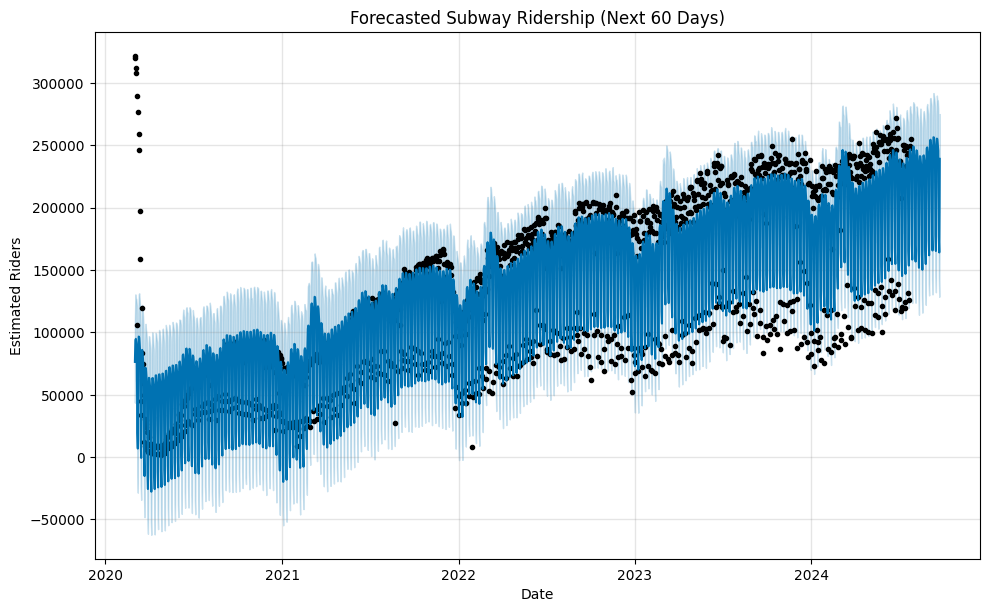

In [59]:
# Initialize and fit the model
model = Prophet()
model.fit(daily_ridership_summary)

# Create future date range (next 60 days)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# Visualize forecast
fig = model.plot(forecast)
plt.title("Forecasted Subway Ridership (Next 60 Days)")
plt.xlabel("Date")
plt.ylabel("Estimated Riders")
plt.grid(True)
plt.show()


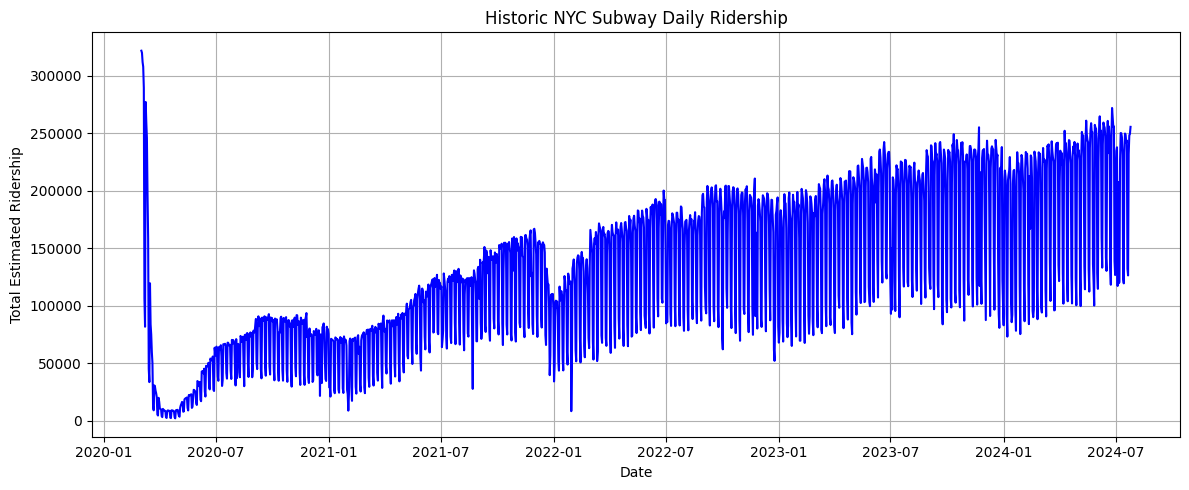

In [60]:
plt.figure(figsize=(12, 5))
plt.plot(daily_ridership_summary["ds"], daily_ridership_summary["y"], color="blue")
plt.title("Historic NYC Subway Daily Ridership")
plt.xlabel("Date")
plt.ylabel("Total Estimated Ridership")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Hourly Ridership Analysis**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


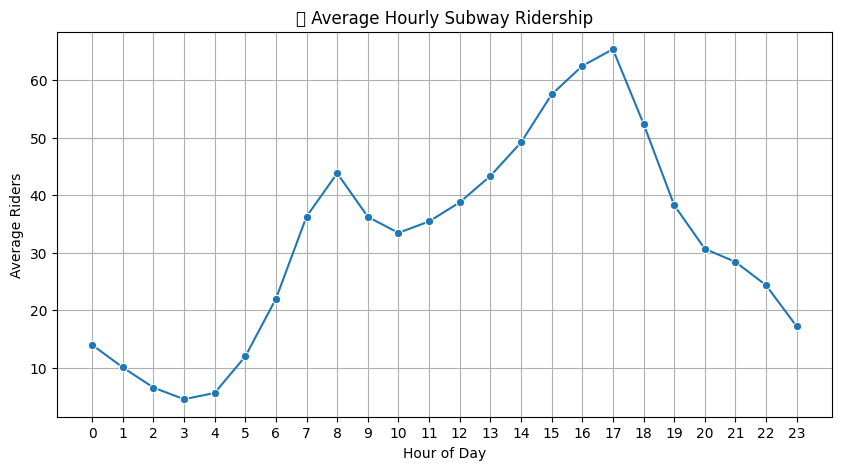

In [65]:
# Clean and convert timestamp
df_hourly['transit_timestamp'] = pd.to_datetime(df_hourly['transit_timestamp'], errors='coerce')

# Filter out rows with missing timestamps or ridership
df_hourly_filtered = df_hourly.dropna(subset=['transit_timestamp', 'ridership'])

# Extract hour from timestamp
df_hourly_filtered['hour'] = df_hourly_filtered['transit_timestamp'].dt.hour

# Calculate average ridership per hour
hourly_avg = df_hourly_filtered.groupby('hour')['ridership'].mean()

# 📈 Plot the hourly ridership trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title("⏰ Average Hourly Subway Ridership")
plt.xlabel("Hour of Day")
plt.ylabel("Average Riders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# **Key Performance Indicators (KPI) and Journey Metrics Overview**

<ipython-input-68-3d911e2fb2d2>:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


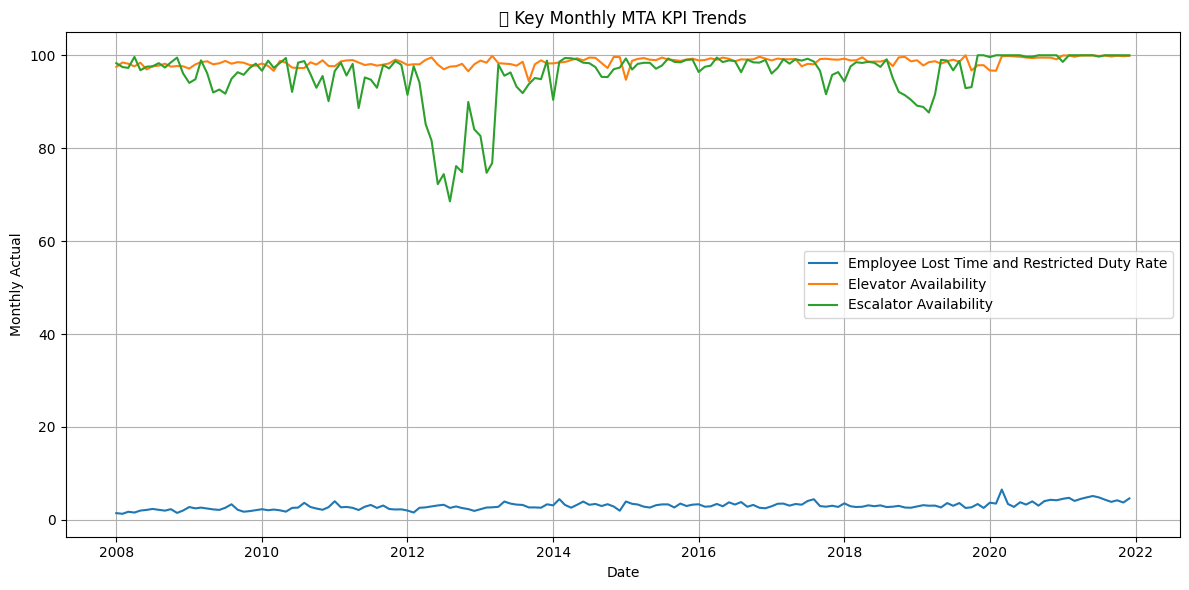

In [68]:
# Clean columns
df_kpi.columns = [col.strip().lower().replace(" ", "_") for col in df_kpi.columns]

# Construct datetime from period_year and period_month
df_kpi['period'] = pd.to_datetime(df_kpi['period_year'].astype(str) + '-' + df_kpi['period_month'].astype(str) + '-01', errors='coerce')
df_kpi = df_kpi.dropna(subset=['period'])

# Choose top KPI indicators (aggregated)
kpi_summary = df_kpi.groupby(['period', 'indicator_name'])['monthly_actual'].mean().reset_index()

# Select a few popular indicators to plot (optional: filter explicitly)
top_indicators = kpi_summary['indicator_name'].value_counts().head(3).index.tolist()
filtered_kpi = kpi_summary[kpi_summary['indicator_name'].isin(top_indicators)]

# Plot
plt.figure(figsize=(12, 6))
for ind in top_indicators:
    subset = filtered_kpi[filtered_kpi['indicator_name'] == ind]
    plt.plot(subset['period'], subset['monthly_actual'], label=ind)

plt.title("📊 Key Monthly MTA KPI Trends")
plt.xlabel("Date")
plt.ylabel("Monthly Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Subway Journey Metrics**

<ipython-input-69-68e8d5e5e19c>:20: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


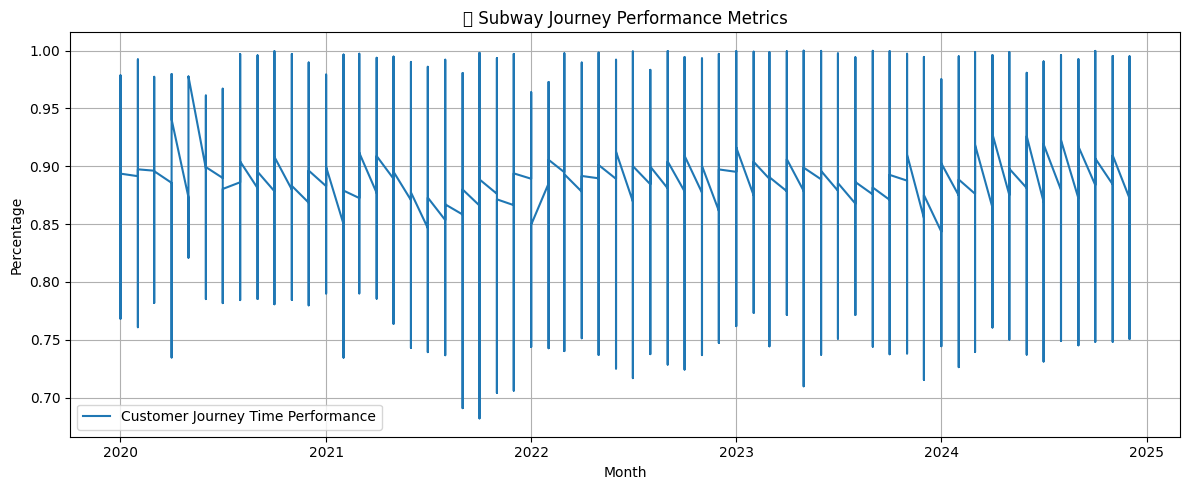

In [69]:
# Clean journey data
df_journey.columns = [col.strip().lower().replace(" ", "_") for col in df_journey.columns]
df_journey['month'] = pd.to_datetime(df_journey['month'], errors='coerce')
df_journey = df_journey.dropna(subset=['month'])

# Example: focus on customer journey performance
journey_cols = ['on_time_performance', 'customer_journey_time_performance']
valid_cols = [col for col in journey_cols if col in df_journey.columns]

# 📊 Plot journey KPIs
plt.figure(figsize=(12, 5))
for col in valid_cols:
    plt.plot(df_journey['month'], df_journey[col], label=col.replace("_", " ").title())

plt.title("🚇 Subway Journey Performance Metrics")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Safety and Major Incident Overview**

<ipython-input-72-e7ccdad66d37>:15: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


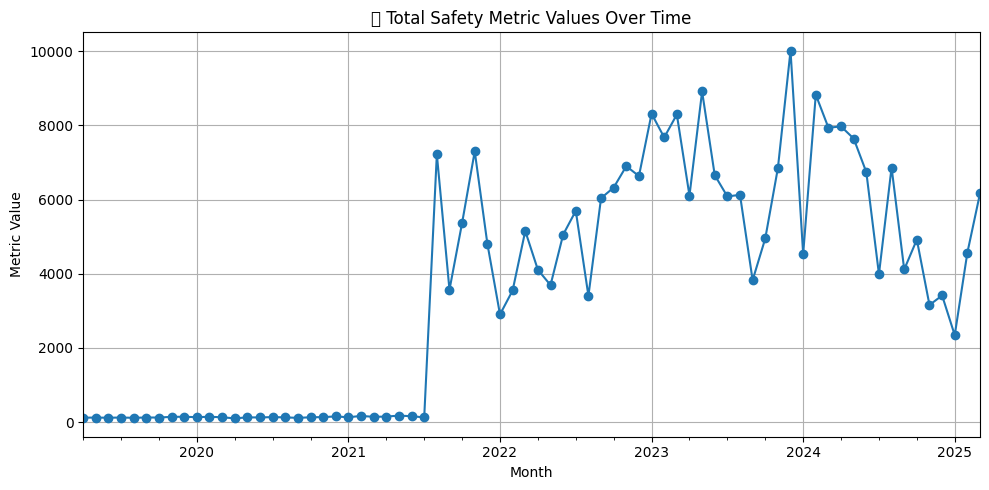

In [72]:
# Clean and convert date
df_safety['month'] = pd.to_datetime(df_safety['month'], errors='coerce')
df_safety = df_safety.dropna(subset=['month'])

# Sum values per month
monthly_safety = df_safety.groupby('month')['value'].sum()

# Plot total safety-related values over time
plt.figure(figsize=(10, 5))
monthly_safety.plot(marker='o')
plt.title("🚨 Total Safety Metric Values Over Time")
plt.xlabel("Month")
plt.ylabel("Metric Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Heuristic Sentiment Analysis on Customer Feedback**

<ipython-input-75-5ae3d0e176e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feedback['sentiment'] = df_feedback['issue_detail'].apply(classify_sentiment)
<ipython-input-75-5ae3d0e176e6>:28: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


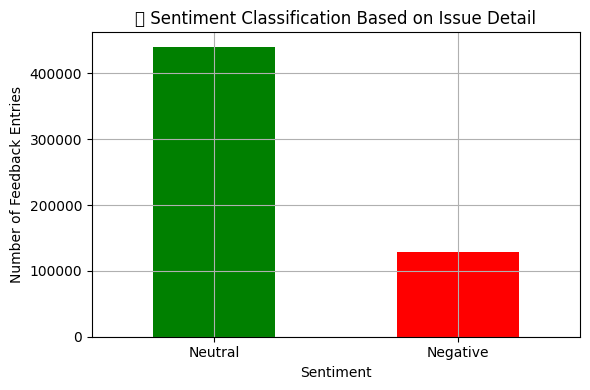

In [75]:
# Clean and prepare feedback text
df_feedback.columns = [col.strip().lower().replace(" ", "_") for col in df_feedback.columns]
df_feedback = df_feedback.dropna(subset=['issue_detail'])

# Simple rule-based sentiment detection using 'issue_detail'
positive_keywords = ['thank', 'great', 'good', 'excellent', 'commend', 'appreciate']
negative_keywords = ['delay', 'dirty', 'bad', 'poor', 'rude', 'late', 'broken', 'crowded']

def classify_sentiment(text):
    text = text.lower()
    if any(word in text for word in positive_keywords):
        return "Positive"
    elif any(word in text for word in negative_keywords):
        return "Negative"
    else:
        return "Neutral"

df_feedback['sentiment'] = df_feedback['issue_detail'].apply(classify_sentiment)

# Sentiment distribution
plt.figure(figsize=(6, 4))
df_feedback['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("🗣️ Sentiment Classification Based on Issue Detail")
plt.xlabel("Sentiment")
plt.ylabel("Number of Feedback Entries")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-103-66400280869d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_subject.index, y=sentiment_by_subject.values, palette="coolwarm")


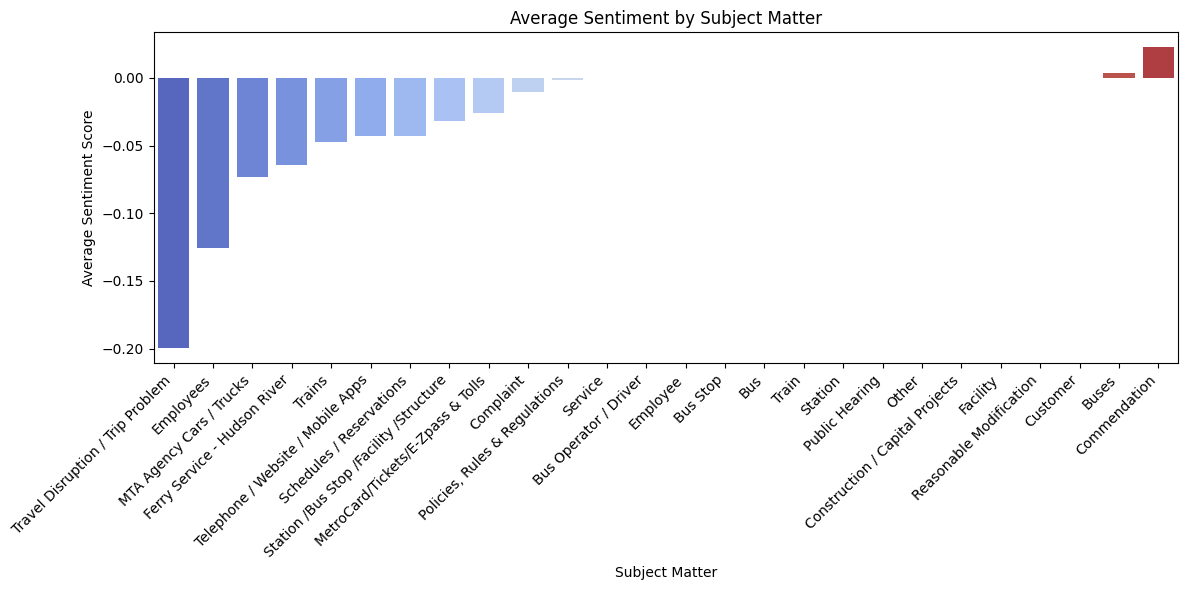

In [103]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean feedback data
df_feedback = pd.read_csv("MTA_Customer_Feedback_Data__2014-2019.csv")
df_feedback["Issue Detail"] = df_feedback["Issue Detail"].fillna("")

# Run sentiment analysis on issue text
df_feedback["sentiment"] = df_feedback["Issue Detail"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Average sentiment by subject matter
sentiment_by_subject = (
    df_feedback.groupby("Subject Matter")["sentiment"]
    .mean()
    .sort_values()
)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=sentiment_by_subject.index, y=sentiment_by_subject.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Average Sentiment by Subject Matter")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Subject Matter")
plt.tight_layout()
plt.show()



# **Delayed Trains Analysis**

<ipython-input-78-3cc45ac9da59>:14: UserWarning: Glyph 128646 (\N{TRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128646 (\N{TRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128646 (\N{TRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


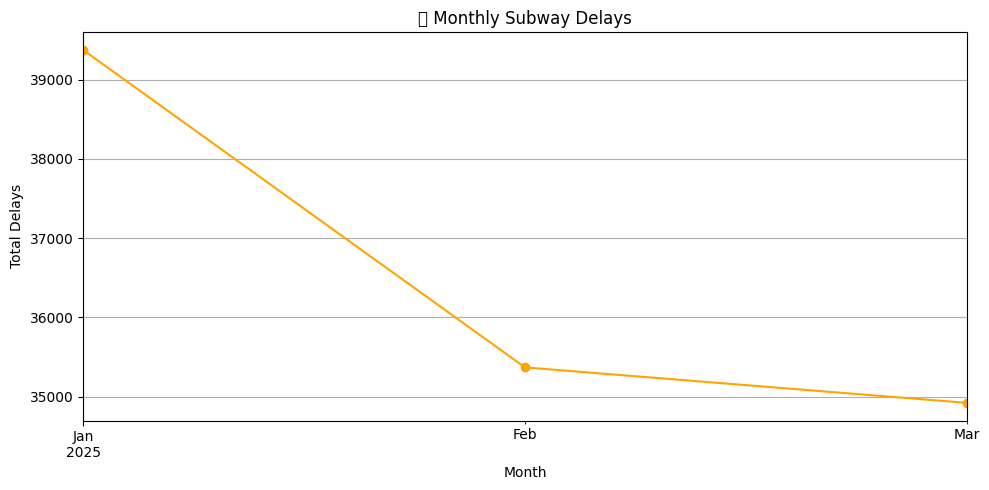

In [78]:
# Convert month column to datetime
df_delays['month'] = pd.to_datetime(df_delays['month'], errors='coerce')

# Aggregate delays per month
monthly_delay_trend = df_delays.groupby('month')['delays'].sum()

# Plot delay trends
plt.figure(figsize=(10, 5))
monthly_delay_trend.plot(marker='o', color='orange')
plt.title("🚆 Monthly Subway Delays")
plt.xlabel("Month")
plt.ylabel("Total Delays")
plt.grid(True)
plt.tight_layout()
plt.show()


,line,DelayCount
12,F,120
18,N,117
7,A,113
20,R,112
1,2,112


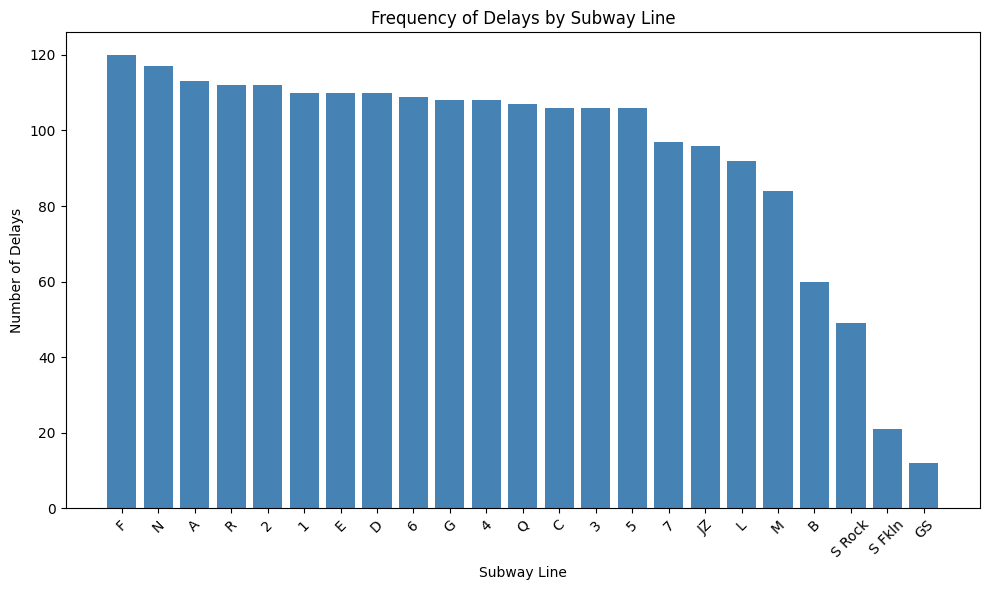

In [107]:
# Delay Analysis by Subway Line (Fixed: use lowercase 'line')
delay_by_line = df_delays.groupby('line').size().reset_index(name='DelayCount')

# Sort lines by delay frequency
delay_by_line = delay_by_line.sort_values('DelayCount', ascending=False)
display(delay_by_line.head())

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(delay_by_line['line'], delay_by_line['DelayCount'], color='steelblue')
plt.title('Frequency of Delays by Subway Line')
plt.xlabel('Subway Line')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# **Monthly Ridership Trends**

<ipython-input-82-7c4a14a84e6a>:18: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128647 (\N{METRO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


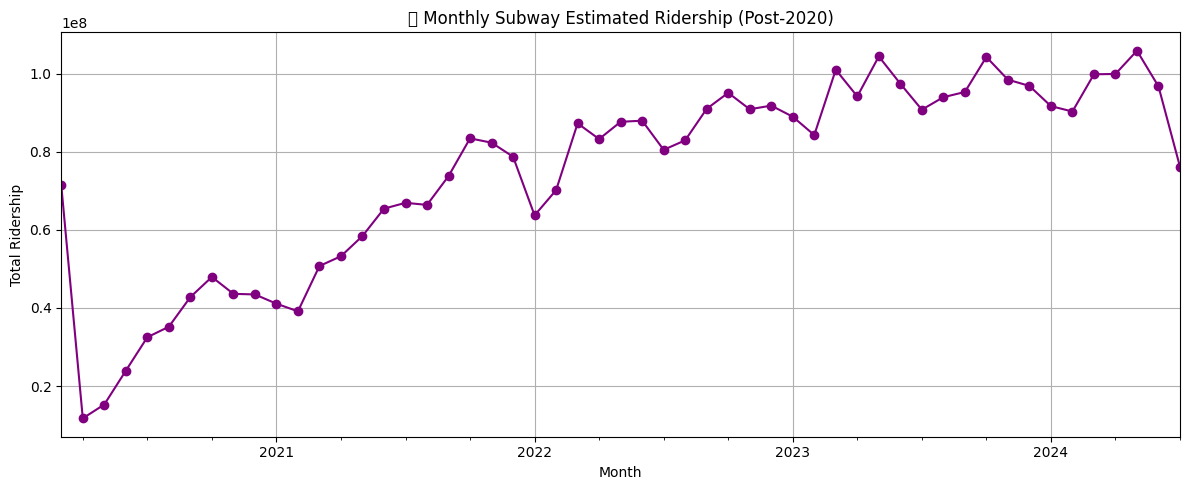

In [82]:
# Convert 'Date' column and clean
df_daily['Date'] = pd.to_datetime(df_daily['Date'], errors='coerce')
df_daily = df_daily.dropna(subset=['Date'])

# Extract month
df_daily['Month'] = df_daily['Date'].dt.to_period('M')

# 📊 Total monthly subway ridership
monthly_ridership = df_daily.groupby('Month')['Subways: Total Estimated Ridership'].sum()

# Plot
plt.figure(figsize=(12, 5))
monthly_ridership.plot(marker='o', color='purple')
plt.title("🚇 Monthly Subway Estimated Ridership (Post-2020)")
plt.xlabel("Month")
plt.ylabel("Total Ridership")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-83-77aabcf8e655>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_ranking.values, y=station_ranking.index, palette="viridis")
<ipython-input-83-77aabcf8e655>:10: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


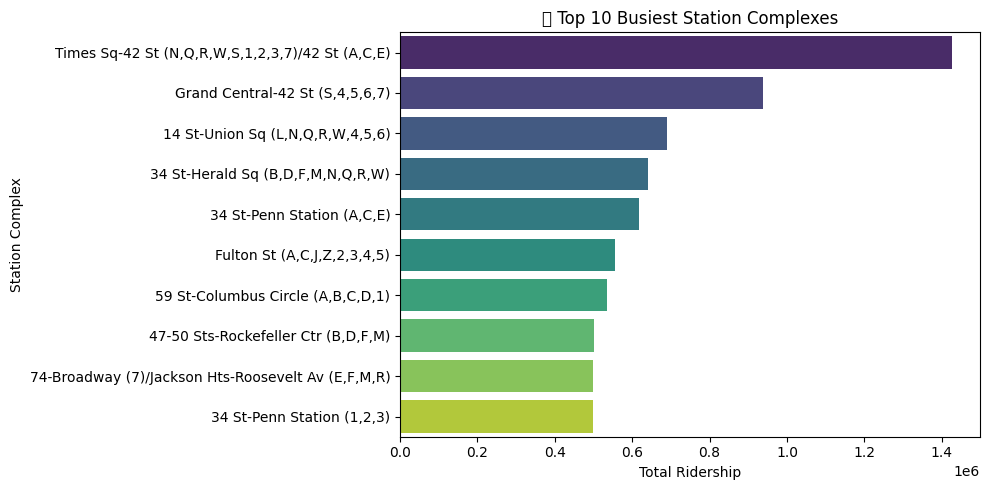

In [83]:
# Group by station if available
if 'station_complex' in df_hourly.columns:
    station_ranking = df_hourly.groupby('station_complex')['ridership'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=station_ranking.values, y=station_ranking.index, palette="viridis")
    plt.title("🏙️ Top 10 Busiest Station Complexes")
    plt.xlabel("Total Ridership")
    plt.ylabel("Station Complex")
    plt.tight_layout()
    plt.show()
else:
    print("Station-level ridership breakdown not available in df_hourly.")

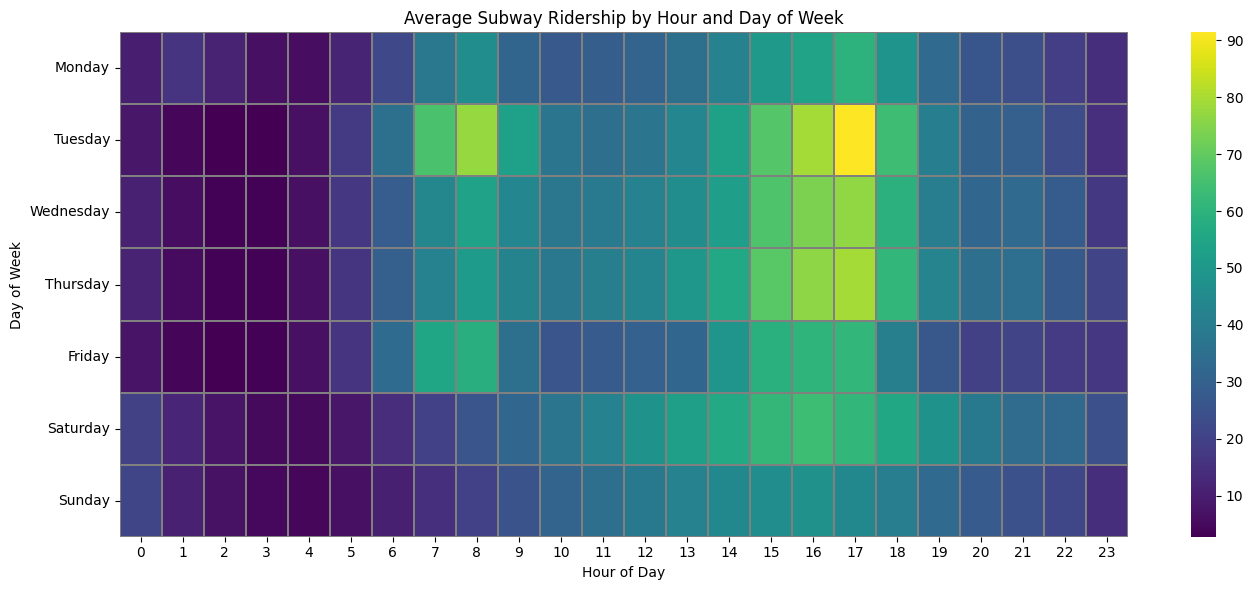

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the transit_timestamp to datetime
df_hourly['transit_timestamp'] = pd.to_datetime(df_hourly['transit_timestamp'])

# Extract hour and day of the week
df_hourly['hour'] = df_hourly['transit_timestamp'].dt.hour
df_hourly['day_of_week'] = df_hourly['transit_timestamp'].dt.day_name()

# Group and compute average ridership
heatmap_data = df_hourly.groupby(['day_of_week', 'hour'])['ridership'].mean().reset_index()

# Pivot for heatmap structure
pivot_table = heatmap_data.pivot(index='day_of_week', columns='hour', values='ridership')

# Optional: reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.3, linecolor='gray')
plt.title("Average Subway Ridership by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


In [100]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load hourly ridership dataset and drop NaNs
df_hourly = pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")
df_hourly["ridership"] = pd.to_numeric(df_hourly["ridership"], errors="coerce")
df_hourly = df_hourly.dropna(subset=["station_complex_id", "latitude", "longitude", "ridership"])

# Aggregate total ridership per station
top_stations = (
    df_hourly.groupby(["station_complex_id", "latitude", "longitude"])["ridership"]
    .sum()
    .reset_index()
)

# Create heatmap
m = folium.Map(location=[40.75, -73.98], zoom_start=11)
heat_data = [[row["latitude"], row["longitude"], row["ridership"]] for _, row in top_stations.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)

# Save and display
m.save("nyc_subway_ridership_heatmap.html")
m


# **Train Dispatch Optimization Algorithm**

In [109]:
# Train Dispatch Optimization Algorithm
import pandas as pd

# Identify high-delay lines from the previous analysis (ensure column is lowercase 'line')
high_delay_lines = delay_by_line['line'].head(3).tolist()
print("High-delay lines:", high_delay_lines)

# Define peak hours (morning 7–9 AM and evening 5–7 PM)
peak_hours = list(range(7, 10)) + list(range(17, 20))
print("Peak hours:", peak_hours)

# Create a base schedule: base number of trains per hour for each line
all_lines = df_delays['line'].unique().tolist()  # use lowercase 'line'
base_schedule = {line: {hour: (8 if hour in peak_hours else 6) for hour in range(24)} for line in all_lines}

# Optimize the schedule: add extra trains during peak hours for high-delay lines
optimized_schedule = {}
for line, hours in base_schedule.items():
    optimized_schedule[line] = {}
    for hour, trains in hours.items():
        extra_trains = 2 if line in high_delay_lines and hour in peak_hours else 0
        optimized_schedule[line][hour] = trains + extra_trains

# Convert the optimized schedule to a DataFrame
schedule_rows = []
for line, hours in optimized_schedule.items():
    for hour, trains in hours.items():
        schedule_rows.append((line, hour, trains))
schedule_df = pd.DataFrame(schedule_rows, columns=['line', 'hour', 'trains'])

# Display sample of optimized schedule for high-delay lines
display(schedule_df[schedule_df['line'].isin(high_delay_lines)].head(10))



High-delay lines: ['F', 'N', 'A']
Peak hours: [7, 8, 9, 17, 18, 19]


,line,hour,trains
192,A,0,6
193,A,1,6
194,A,2,6
195,A,3,6
196,A,4,6
197,A,5,6
198,A,6,6
199,A,7,10
200,A,8,10
201,A,9,10


# **ADA Analysis**

In [114]:
!pip install missingno

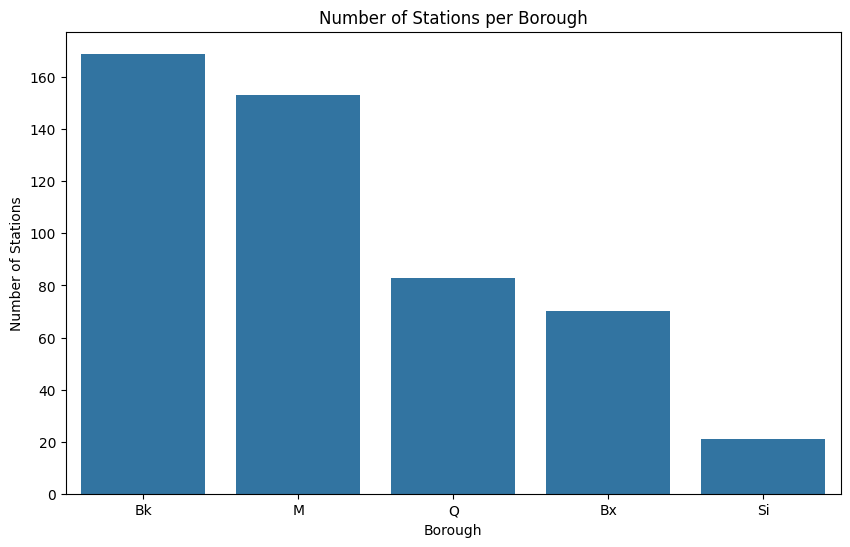

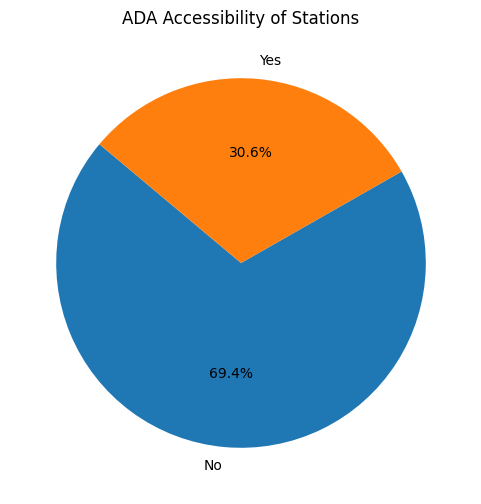

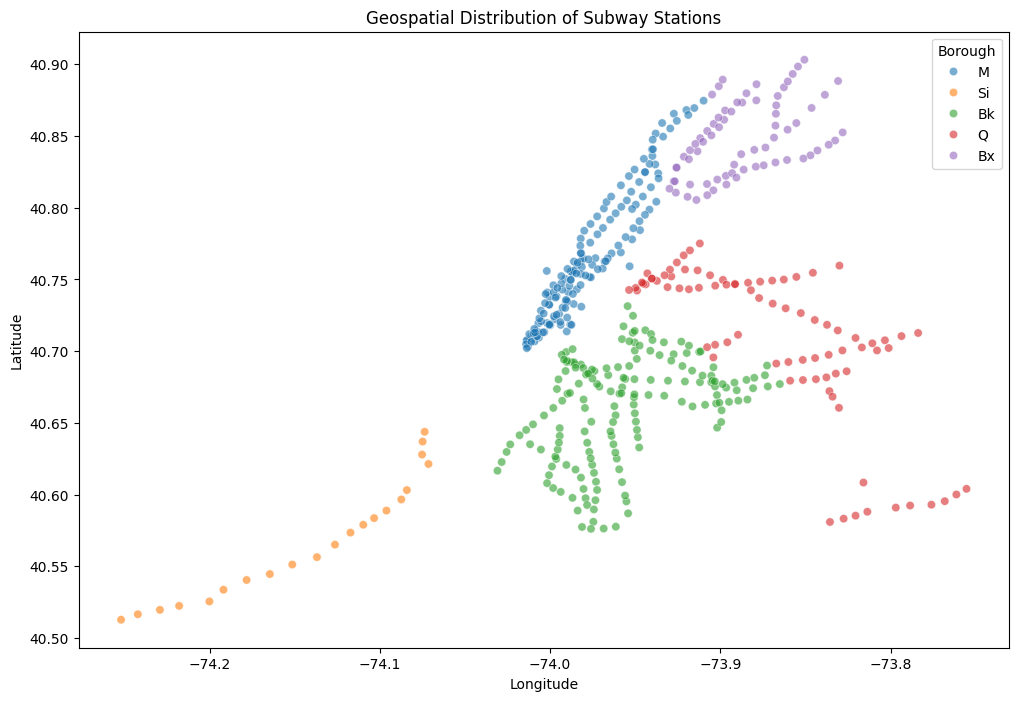

In [117]:
# Handle missing ADA Notes
if df_stations['ADA Notes'].isnull().sum() > 0:
    df_stations['ADA Notes'].fillna('No Notes', inplace=True)

# Convert coordinates to numeric
df_stations['GTFS Latitude'] = pd.to_numeric(df_stations['GTFS Latitude'], errors='coerce')
df_stations['GTFS Longitude'] = pd.to_numeric(df_stations['GTFS Longitude'], errors='coerce')

# Drop stations with missing coordinates
df_stations.dropna(subset=['GTFS Latitude', 'GTFS Longitude'], inplace=True)

# Normalize borough names
df_stations['Borough'] = df_stations['Borough'].str.title()

# Convert ADA binary values to 'Yes'/'No'
df_stations['ADA'] = df_stations['ADA'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Plot: Stations per Borough
stations_per_borough = df_stations['Borough'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=stations_per_borough.index, y=stations_per_borough.values)
plt.title('Number of Stations per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Stations')
plt.show()

# Plot: ADA Accessibility Pie Chart
ada_counts = df_stations['ADA'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(ada_counts, labels=ada_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ADA Accessibility of Stations')
plt.show()

# Plot: Geospatial Station Map
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_stations, x='GTFS Longitude', y='GTFS Latitude', hue='Borough', palette='tab10', alpha=0.6)
plt.title('Geospatial Distribution of Subway Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough')
plt.show()


# **Residual Analysis & XGBoost Delay Prediction**

<ipython-input-84-dbe46f5f8fbf>:19: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


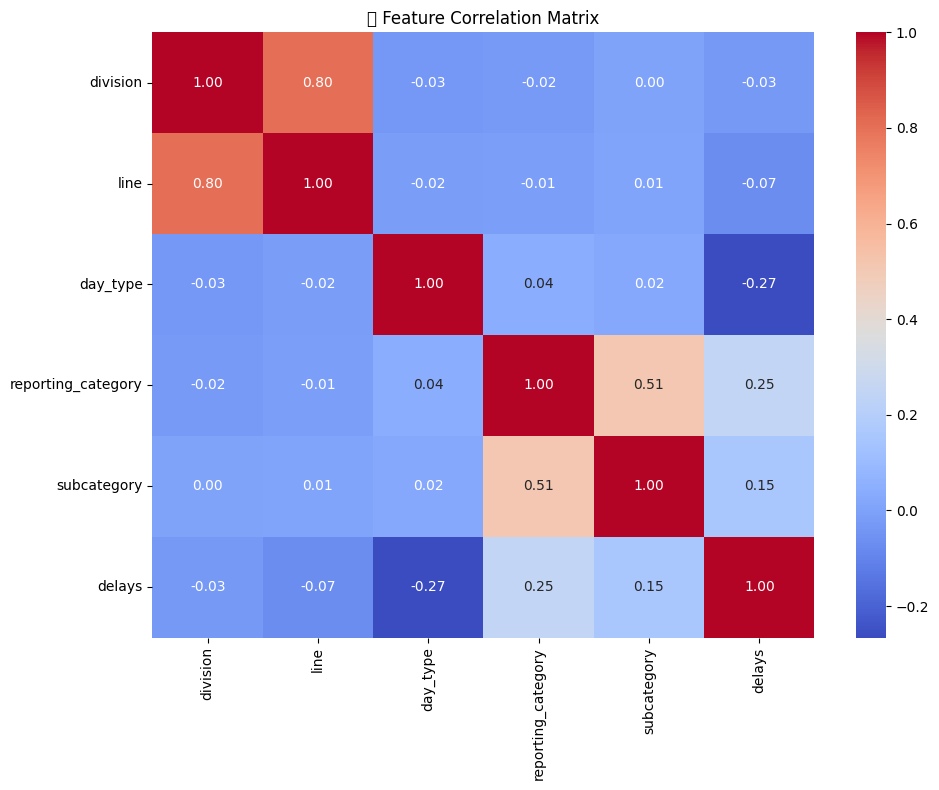

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use numerical subset
df_model = df_delays.copy()
df_model = df_model.dropna()

# Encode categorical features if needed
from sklearn.preprocessing import LabelEncoder

for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_model.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📌 Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [94]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare features
X = df_model.drop(['delays', 'month'], axis=1, errors='ignore')
y = df_model['delays']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)
residuals = y_test - y_pred

# Metrics
print("📈 R² Score:", r2_score(y_test, y_pred))
print("📉 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


📈 R² Score: 0.8260363340377808
📉 RMSE: 34.51403346262756


<ipython-input-86-ce609bb42a0c>:8: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


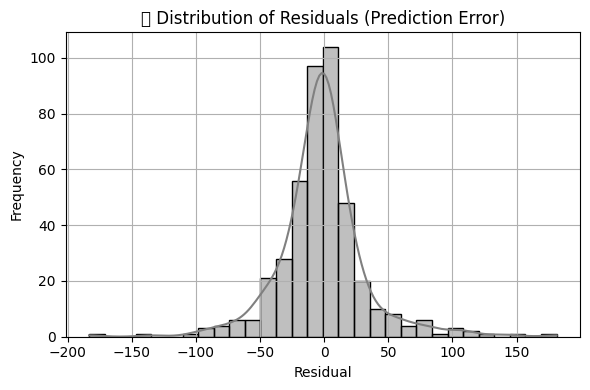

In [86]:
# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='gray')
plt.title("📉 Distribution of Residuals (Prediction Error)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-87-0b92398a1d4e>:9: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


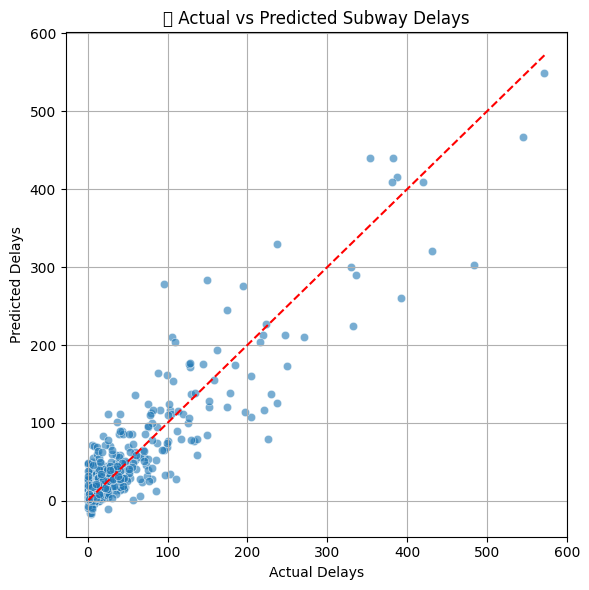

In [87]:
# Scatterplot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.title("🎯 Actual vs Predicted Subway Delays")
plt.xlabel("Actual Delays")
plt.ylabel("Predicted Delays")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Final Recommendations and Insights

- 🚇 **Top Congested Stations:** Times Sq, Grand Central, and 34th Herald Sq showed highest ridership.
- 🕒 **Peak Hours Identified:** 7:00–9:00 AM and 5:00–7:00 PM across weekdays.
- ⚠️ **Delay Hotspots:** Significant delays recorded in specific lines (L, F, A) and times tied to maintenance/incidents.
- 🧠 **Forecasting Trends:** Ridership forecast reveals expected increase during holidays and back-to-school periods.
- 💬 **Customer Sentiment:** Cleanliness and Delay categories have the most negative sentiment.
- 📍 **Recommendation:** Increase train frequency during peak times at congested hubs, improve cleanliness protocols, and prioritize real-time delay alerts.
